In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy

import env
import explore
import acquire
import prepare

plt.rcParams['figure.figsize'] = (4, 2)

Using iris data from our mySQL server and the methods used in the lesson above:

## 1. Acquire, prepare & split your data.

Acquire data using acquire.py

        Aquires iris data from SQL db and merges measurement and species tables

In [2]:
df = acquire.get_iris_data()
df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


Prep the data using prepare.prep_iris

    Takes in data from the iris db and turns it into a dataframe.
    Drops 'species_id' and 'measurement_id' columns.
    Renames the 'species_name' column to 'species'.
    Creates dummy variables of species name.

In [3]:
df = prepare.prep_iris(df)
df

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


Split the data

        take in a DataFrame and return train, validate, and test DataFrames; 
        test is 30% of original size
        stratify on species.
        returns train, validate, test DataFrames.

In [4]:
train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123, 
                                        stratify=df.species)

train, validate = train_test_split(train_validate, 
                                           test_size=.3, 
                                           random_state=123, 
                                           stratify=train_validate.species)
print(train.shape, validate.shape, test.shape)

(84, 8) (36, 8) (30, 8)


## 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [5]:
# Create the variables that hold the categorical and quantitative measurements

cat_vars = ['setosa','versicolor','virginica']
quant_vars = ['sepal_length','sepal_width','petal_length','petal_width']

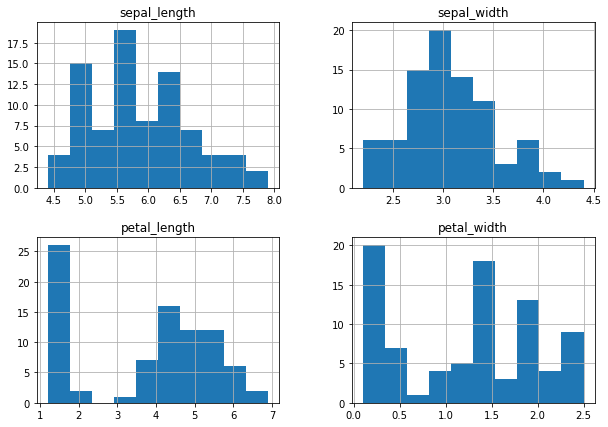

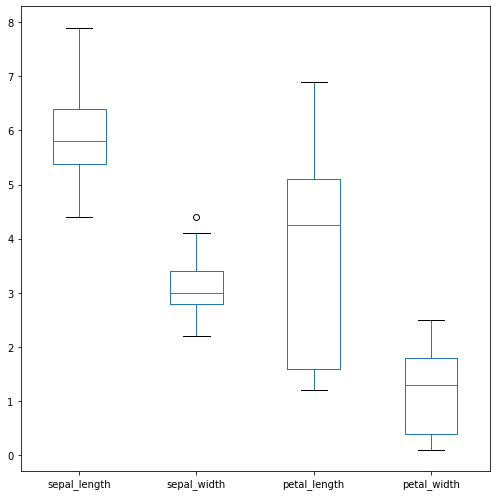

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
train[quant_vars].hist(figsize=(10,7))
train[quant_vars].plot.box(figsize=(7,7))
plt.tight_layout()
plt.show()
train[quant_vars].describe()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [84]:
species_piv = train.pivot_table(columns=train.species).head(4)
species_piv.T

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.507143,0.275000,5.089286,3.467857
versicolor,4.271429,1.314286,5.896429,2.796429
virginica,5.535714,2.021429,6.625000,2.960714


(array([0, 1, 2, 3]),
 [Text(0, 0, 'petal_length'),
  Text(1, 0, 'petal_width'),
  Text(2, 0, 'sepal_length'),
  Text(3, 0, 'sepal_width')])

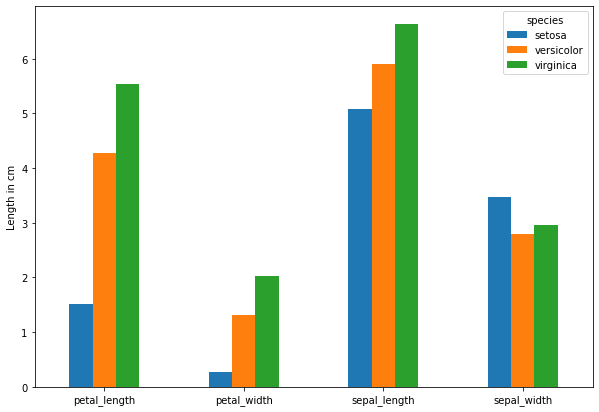

In [85]:
# plot a bar chart
species_piv.plot.bar(figsize=(10,7))
plt.ylabel('Length in cm')
plt.xticks(rotation=0)

- Document takeaways & any actions.

> On average, setosa  has the smallest measurements, followed by versicolor, then virginica (all measurements e except sepal width)

> Sepal width does not appear to be a good inidicator of iris species.

> Petal length appears to be the most reliable indicartor of species.


## 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

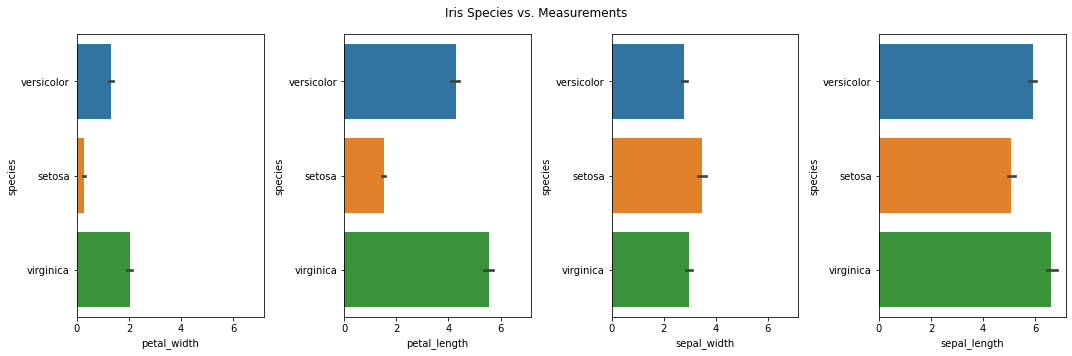

In [86]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True)
sns.color_palette("tab10")
fig.suptitle('Iris Species vs. Measurements')

sns.barplot(ax=axes[0], x='petal_width', y='species', data=train)

sns.barplot(ax=axes[1], x='petal_length', y='species', data=train)

sns.barplot(ax=axes[2], x='sepal_width', y='species', data=train)

sns.barplot(ax=axes[3], x='sepal_length', y='species', data=train)

plt.tight_layout()

- For each measurement type, compute the descriptive statistics for each species.

In [87]:
for i in train[quant_vars]:
    for j in train[cat_vars]:
        print(j)
        print(train[i][train[j]==1].describe())
        print(f'\n')

setosa
count    28.000000
mean      5.089286
std       0.360390
min       4.400000
25%       4.875000
50%       5.000000
75%       5.400000
max       5.800000
Name: sepal_length, dtype: float64


versicolor
count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64


virginica
count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64


setosa
count    28.000000
mean      3.467857
std       0.427788
min       2.300000
25%       3.275000
50%       3.400000
75%       3.800000
max       4.400000
Name: sepal_width, dtype: float64


versicolor
count    28.000000
mean      2.796429
std       0.280848
min       2.300000
25%       2.600000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal_width, dtype: float64


virginica
c

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

$H_{0}$: There is no significant difference in the measurements of the virginica and versicolor.

$H_{a}$: There is a significant difference in the measurements of the virginica and versicolor.

In [11]:
alpha = 0.5

In [88]:
for i in train[quant_vars]:
    statistic, pvalue = scipy.stats.mannwhitneyu(train[i][df.versicolor==1], train[i][df.virginica==1])
    if pvalue < alpha:
        print(f'{i} of virginica and versicolor')
        print(f'statistic = {statistic}, pvalue = {pvalue}')
        print('pvalue < alpha')
        print(f'We reject the null hypothesis that states there is no signifcant difference in {i}')
        print()

sepal_length of virginica and versicolor
statistic = 107.5, pvalue = 1.541014598267054e-06
pvalue < alpha
We reject the null hypothesis that states there is no signifcant difference in sepal_length

sepal_width of virginica and versicolor
statistic = 274.0, pvalue = 0.026286295699228482
pvalue < alpha
We reject the null hypothesis that states there is no signifcant difference in sepal_width

petal_length of virginica and versicolor
statistic = 7.5, pvalue = 1.4739917857575313e-10
pvalue < alpha
We reject the null hypothesis that states there is no signifcant difference in petal_length

petal_width of virginica and versicolor
statistic = 17.0, pvalue = 3.235595834904965e-10
pvalue < alpha
We reject the null hypothesis that states there is no signifcant difference in petal_width



- Document takeaways & any actions.

>On average, virginica always has larger measurements than versicolor.

## 3. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [89]:
# Create copy df with no dummy variables

df_pairplot = train[train.columns[~train.columns.isin(cat_vars)]].copy()
df_pairplot

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
55,5.7,2.8,4.5,1.3,versicolor
44,5.1,3.8,1.9,0.4,setosa


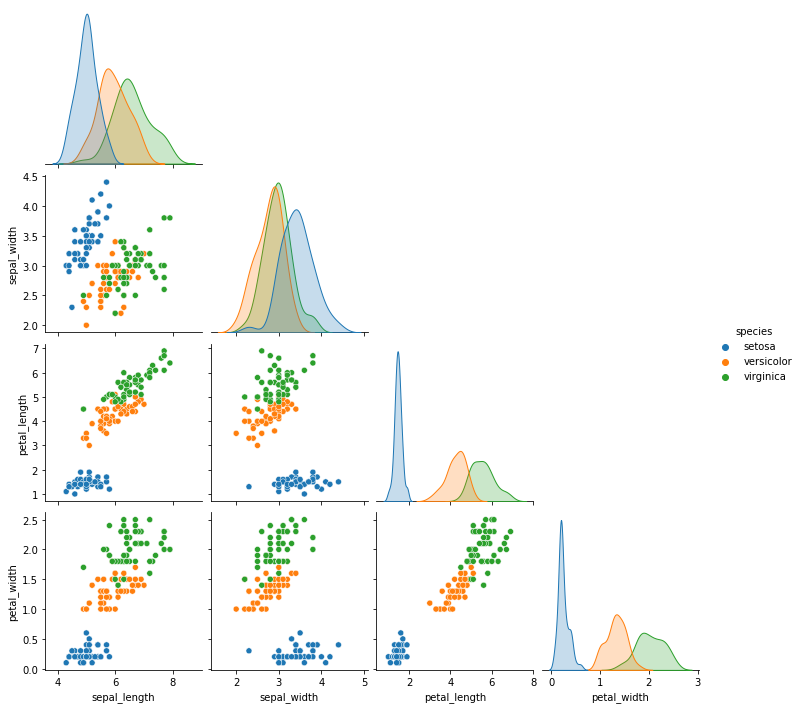

In [46]:
sns.pairplot(df_pairplot, hue='species', corner=True)

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [117]:
df_melt = pd.melt(train, 
                  id_vars='species', 
                  value_vars=train[quant_vars],
                  var_name='measure', 
                  value_name='measurement')
df_melt 

,species,measure,measurement
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


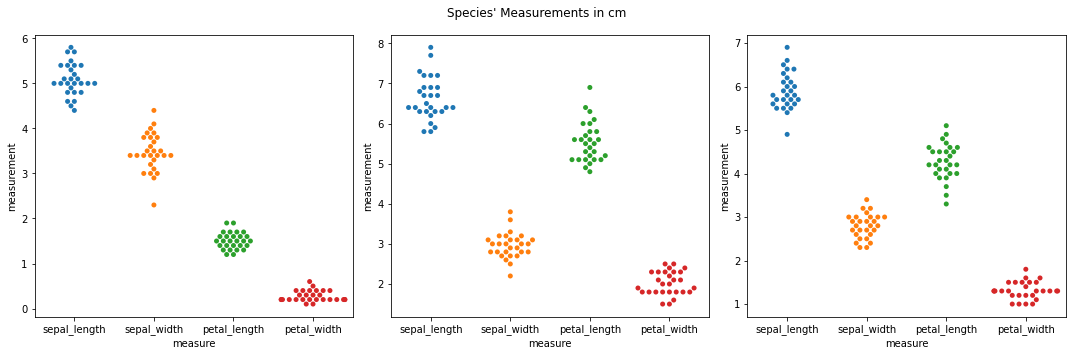

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.color_palette("tab10")
fig.suptitle("Species' Measurements in cm")

sns.swarmplot(ax=axes[0], data=df_melt[df_melt.species=='setosa'], x='measure', y='measurement')

sns.swarmplot(ax=axes[1], data=df_melt[df_melt.species=='virginica'], x='measure', y='measurement')

sns.swarmplot(ax=axes[2], data=df_melt[df_melt.species=='versicolor'], x='measure', y='measurement')

plt.tight_layout()

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.